![](Screenshot_teachablemachine.png)

In [15]:
from PIL import Image, ImageOps
import numpy as np
from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt

In [7]:
def image_to_array(image_path):
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

    image = Image.open(image_path).convert("RGB")
    image = ImageOps.fit(image, (224, 224), Image.LANCZOS)

    image_array = np.asarray(image)

    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

    data[0] = normalized_image_array

    return data

In [18]:
def get_prediction(C):
    prediction = model.predict(image_to_array('./test/hot_dog/133012.jpg'))
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    return [class_name, confidence_score]

In [22]:


tp = 0
fp = 0
fn = 0
tn = 0

hot_dog_test_files = os.listdir('./test/hot_dog/')
for hot_dog_test_file in hot_dog_test_files:
    prediction = get_prediction(hot_dog_test_file)
    
    if prediction[0][2:] == 'Hotdog':
        tp+=1
    else:
        fn+=1


hot_dog_test_files = os.listdir('./test/not_hot_dog/')
for hot_dog_test_file in hot_dog_test_files:
    prediction = get_prediction(hot_dog_test_file)
    
    if prediction[0][2:] == 'NotHotdog':
        tn+=1
    else:
        fp+=1

print('True Positiv: ', tp)
print('False Negative: ', fn)

print('True Negative: ', tn)
print('False Positiv: ', fp)

1/1 [==============================] - 0s 13ms/step
True Positiv:  0
False Negative:  250
True Negative:  0
False Positiv:  250


Confusion Matrix:
[[3 0 0]
 [0 3 1]
 [0 1 2]]


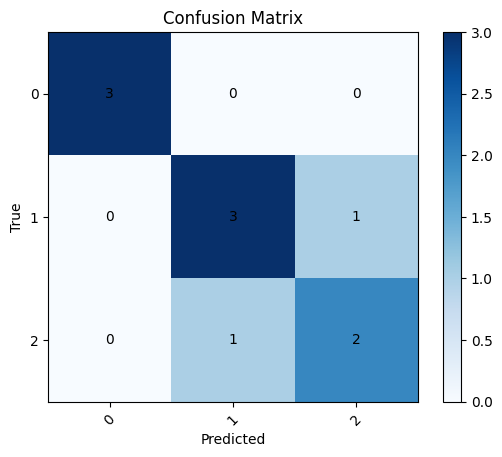

In [28]:
from sklearn.metrics import confusion_matrix

# Example data (replace this with your actual data)
y_true = np.array([1, 0, 1, 2, 1, 0, 1, 2, 2, 0])
y_pred = np.array([1, 0, 1, 2, 2, 0, 1, 2, 1, 0])

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap using Matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(y_true)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()